задание 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Загрузим данные
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

# Определим X и y
X = data.drop('PRICE', axis=1)
y = data['PRICE']

# Разобьем данные на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создадим модель линейной регрессии
lr = LinearRegression()

# Обучим модель на тренировочных данных
lr.fit(X_train, y_train)

# Сделаем предсказание на тестовых данных
predictions = lr.predict(X_test)

In [2]:
predictions

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

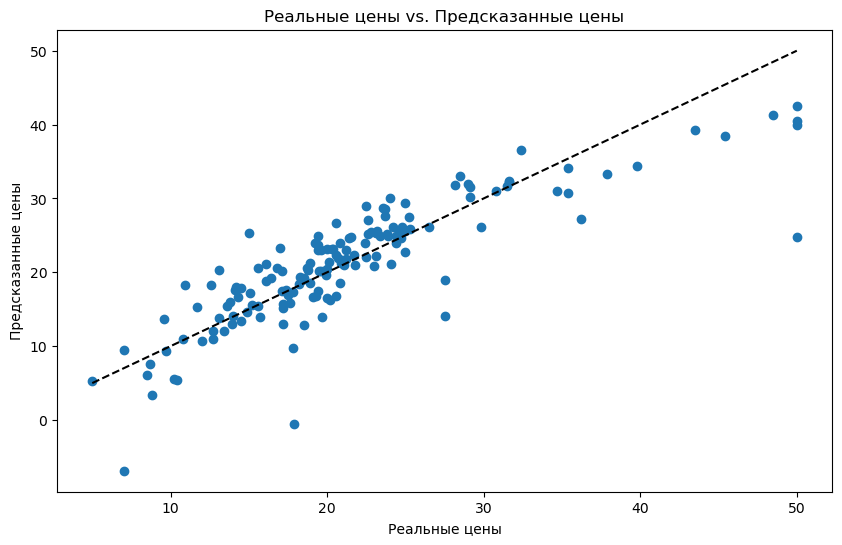

In [3]:
import matplotlib.pyplot as plt

# Создадим график
plt.figure(figsize=(10, 6))

# Нанесем точки реальных цен на график
plt.scatter(y_test, predictions)

# Добавим заголовок и подписи к осям
plt.title('Реальные цены vs. Предсказанные цены')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')

# Добавим линию идеальной предсказанной зависимости (идеальный случай: точки расположены по диагонали)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Покажем график
plt.show()

задание 2

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Создадим модель случайного леса
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

# Обучим модель на тренировочных данных
model.fit(X_train, y_train)

# Сделаем предсказание на тестовых данных
predictions_rf = model.predict(X_test)

# Посчитаем R2
r2_rf = r2_score(y_test, predictions_rf)

print(f"R2 для Random Forest модели: {r2_rf}")

R2 для Random Forest модели: 0.87472606157312


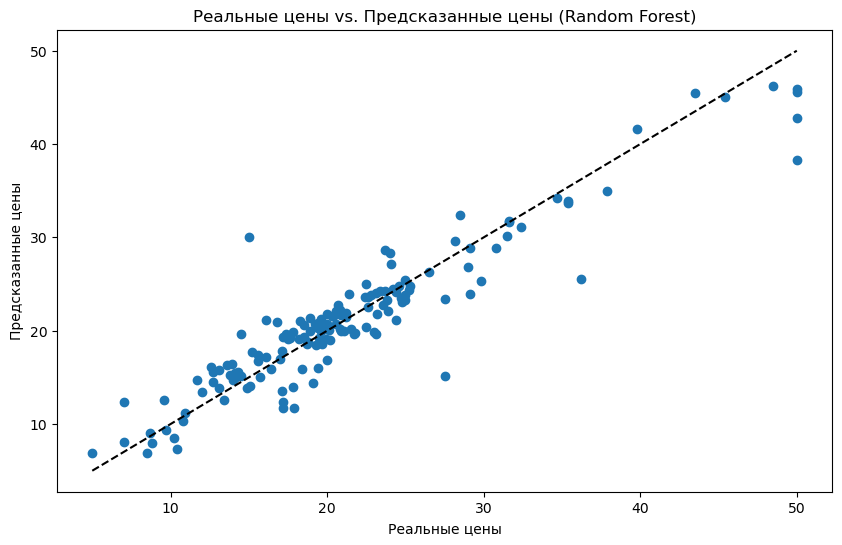

In [6]:
import matplotlib.pyplot as plt

# Создадим график
plt.figure(figsize=(10, 6))

# Нанесем точки реальных цен на график
plt.scatter(y_test, predictions_rf)

# Добавим заголовок и подписи к осям
plt.title('Реальные цены vs. Предсказанные цены (Random Forest)')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')

# Добавим линию идеальной предсказанной зависимости
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Покажем график
plt.show()

Оба графика говорят сами за себя, модель основанная на случайном лесе выглядит понадёжнее))) 

задание 3

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Создадим модель RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train)

# Найдем сумму всех показателей важности
total_importance = model.feature_importances_.sum()

# Найдем индексы двух признаков с наибольшей важностью
top_features_indices = model.feature_importances_.argsort()[-2:][::-1]

# Названия признаков с наибольшей важностью
top_features = X.columns[top_features_indices]

print(f"Сумма всех показателей важности: {total_importance}")
print(f"Два признака с наибольшей важностью: {top_features}")

Сумма всех показателей важности: 1.0
Два признака с наибольшей важностью: Index(['LSTAT', 'RM'], dtype='object')


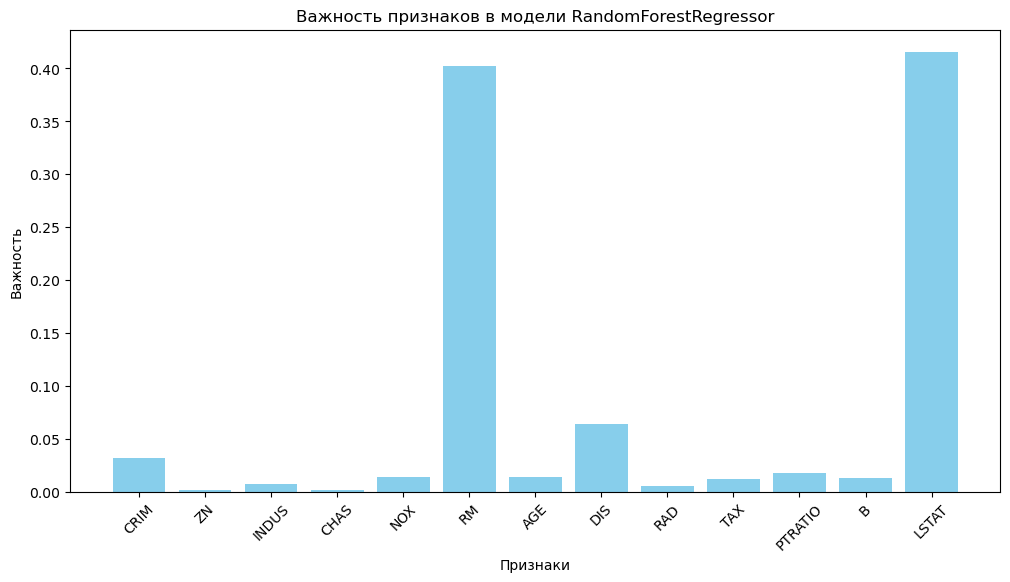

In [8]:
import matplotlib.pyplot as plt

# Получим важность признаков из обученной модели RandomForestRegressor
feature_importance = model.feature_importances_
feature_names = X.columns

# Создадим график
plt.figure(figsize=(12, 6))

# Построим столбчатую диаграмму с важностью каждого признака
plt.bar(feature_names, feature_importance, color='skyblue')

# Добавим заголовок и подписи к осям
plt.title('Важность признаков в модели RandomForestRegressor')
plt.xlabel('Признаки')
plt.ylabel('Важность')

# Повернем названия признаков для лучшей читаемости
plt.xticks(rotation=45)

# Покажем график
plt.show()

задание 4

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

# Загрузим датасет и создадим датафрейм
df = pd.read_csv('creditcard.csv')

# Проверим несбалансированность выборки
print(df['Class'].value_counts(normalize=True))

# Проверим типы данных и наличие пропущенных значений
pd.options.display.max_columns = 100
print(df.info())

# Просмотрим первые 10 строк датафрейма
print(df.head(10))

# Создадим датафрейм X без столбца Class и Series y
X = df.drop('Class', axis=1)
y = df['Class']

# Разобьем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# Зададим параметры для поиска по сетке
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

# Создадим модель GridSearchCV
model = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3)

# Обучим модель
model.fit(X_train, y_train)

# Выведем параметры лучшей модели
print("Лучшие параметры модели:", model.best_params_)

# Получим вероятности классов и выберем вероятности класса 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычислим AUC на тестовых данных
auc_test = roc_auc_score(y_test, y_pred_proba)
print("AUC на тестовых данных:", auc_test)

# Сравним результаты на тренировочных данных
y_pred_proba_train = model.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred_proba_train)
print("AUC на тренировочных данных:", auc_train)

0    0.998273
1    0.001727
Name: Class, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float

Дополнительные задания:

In [11]:
from sklearn.datasets import load_wine

# Загрузим датасет Wine
data = load_wine()

# Проверим тип переменной data
print(type(data))

<class 'sklearn.utils.Bunch'>


In [12]:
# Проверим тип данных структуры данных из датасета
data_type = type(data)
print("Тип данных структуры data:", data_type)

# Создадим список ключей данной структуры данных
data_keys = data.keys()
print("Ключи структуры данных:", data_keys)

Тип данных структуры data: <class 'sklearn.utils.Bunch'>
Ключи структуры данных: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [13]:
# Получим данные, описание и названия признаков из датасета
data_values = data['data']  # данные
data_description = data['DESCR']  # описание
feature_names = data['feature_names']  # названия признаков

# Выведем описание датасета
print(data_description)

# Выведем названия признаков
print("Названия признаков:")
for feature_name in feature_names:
    print("- " + feature_name)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [14]:
# Определим количество классов в целевой переменной
num_classes = len(data['target_names'])

# Выведем количество классов
print("Количество классов в целевой переменной:", num_classes)

# Выведем названия классов
print("Названия классов:")
for class_name in data['target_names']:
    print("- " + str(class_name))

Количество классов в целевой переменной: 3
Названия классов:
- class_0
- class_1
- class_2


In [29]:
from IPython.display import display
import pandas as pd

# Создадим датафрейм X на основе данных и названий признаков
X = pd.DataFrame(data['data'], columns=data['feature_names'])

# Выведем первые строки датафрейма X для проверки
display(X.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [30]:
# Определим размер датафрейма X
data_shape = X.shape
print("Размер датафрейма X:", data_shape)

# Проверим наличие пропущенных значений в датафрейме X
missing_values = X.isnull().sum().sum()
if missing_values == 0:
    print("В датафрейме X отсутствуют пропущенные значения.")
else:
    print("В датафрейме X имеются пропущенные значения.")

Размер датафрейма X: (178, 13)
В датафрейме X отсутствуют пропущенные значения.


In [31]:
import numpy as np

# Добавим поле 'target' с классами вин в виде чисел в датафрейм X
X['target'] = np.array(data['target'], dtype=np.int64)

# Проверим, что поле было успешно добавлено
display(X.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [32]:
# Построим матрицу корреляций для всех полей в датафрейме X
X_corr = X.corr()

# Выведем название полученного датафрейма
print("Название датафрейма матрицы корреляций: X_corr")

# Выведем матрицу корреляций для проверки
display(X_corr)

Название датафрейма матрицы корреляций: X_corr


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [33]:
# Отфильтруем признаки, корреляция которых с полем 'target' превышает 0.5
high_corr = X_corr.loc[(np.abs(X_corr['target']) > 0.5) & (X_corr.index != 'target')].index.tolist()

# Выведем список high_corr
print(high_corr)

['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [34]:
# Удалим поле с целевой переменной из датафрейма X
X = X.drop('target', axis=1)

# Вычислим квадрат значений признаков из списка high_corr и добавим соответствующие поля
for feature in high_corr:
    X[f'{feature}_2'] = X[feature] ** 2

# Выведем описание полей датафрейма X с помощью метода describe    
    
print(X.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

ps: Почему то припопытке использовать функцию  display() выдаёт ошибку(((, промучался и так и не понял почему, наверное тупой))